In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

df=pd.read_csv('data.csv')



                                          clean_text  is_depression
0  we understand that most people who reply immed...              1
1  welcome to r depression s check in post a plac...              1
2  anyone else instead of sleeping more when depr...              1
3  i ve kind of stuffed around a lot in my life d...              1
4  sleep is my greatest and most comforting escap...              1
(7731, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7731 non-null   object
 1   is_depression  7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB
None
       is_depression
count    7731.000000
mean        0.495537
std         0.500012
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
                                                   text  t

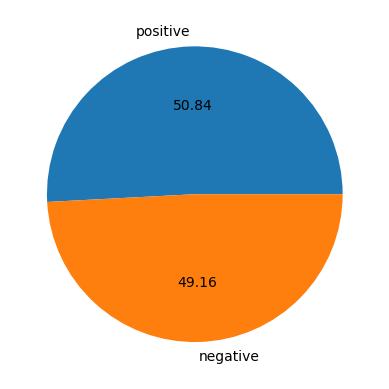

In [4]:
print(df.head())

print(df.shape)

print(df.info())

print(df.describe())



# just replacing the values for generality
df.rename(columns={'clean_text':'text','is_depression':'target'},inplace=True)

#let's analyze the data
print(df)

print(df.duplicated().sum())
#it refers the total no.of duplicate rows in the data

df.drop_duplicates(keep='first',inplace=True)



print(df.shape)



df['target'].value_counts()

import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['positive','negative'], autopct="%0.2f")
plt.show()



In [5]:


!pip install rake-nltk
import pandas as pd
from rake_nltk import Rake
import string
from nltk.corpus import stopwords
import nltk
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')



# Initialize RAKE
r = Rake()

# Function to preprocess text (remove punctuation and stopwords)
def preprocess_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = text.split()  # Tokenize text
    stop_words = set(stopwords.words('english'))  # Define stopwords
    words = [word for word in words if word.lower() not in stop_words]  # Remove stopwords
    return ' '.join(words)  # Reconstruct text without stopwords

# Apply preprocessing to 'text' column
df['preprocessed_text'] = df['text'].apply(preprocess_text)

# Apply RAKE on preprocessed text
df['keywords'] = df['preprocessed_text'].apply(lambda x: r.extract_keywords_from_text(x))

# Extract the keywords
df['keywords'] = df['preprocessed_text'].apply(lambda x: r.get_ranked_phrases())

df.keywords[0]

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Convert the list of keywords into a single string
df['keywords_str'] = df['keywords'].apply(lambda x: ' '.join(x))

# Create Bag of Words model using the 'keywords_str' column
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['keywords_str'])

# Create TF-IDF model using the 'keywords_str' column
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['keywords_str'])

# Convert the BoW and TF-IDF matrices to sparse matrices
bow_matrix = X_bow
tfidf_matrix = X_tfidf



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.503921568627451
Precision: 0.2539369473279508
Recall: 0.503921568627451
F1 Score: 0.3376997213487742


C:\Users\karth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


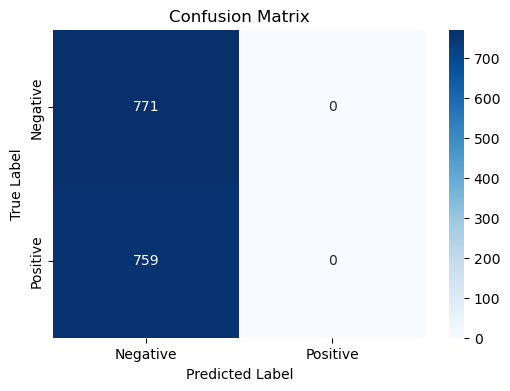

In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Concatenate BoW and TF-IDF matrices horizontally
X_combined = hstack([bow_matrix, tfidf_matrix])

# Target variable
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Initialize and fit logistic regression model
logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
logistic_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


SVM Evaluation Metrics:
Accuracy: 0.503921568627451
Precision: 0.2539369473279508
Recall: 0.503921568627451
F1 Score: 0.3376997213487742


C:\Users\karth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


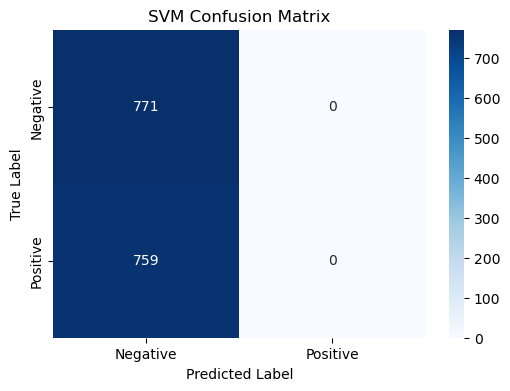

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Define hyperparameter grid for grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly']}

# Initialize SVM classifier
svm_classifier = SVC()

# Initialize grid search
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best SVM model from grid search
best_svm_model = grid_search.best_estimator_

# Predict on the testing data
y_pred_svm = best_svm_model.predict(X_test)

# Calculate evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Print evaluation metrics
print("SVM Evaluation Metrics:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)

# Calculate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


C:\Users\karth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBoost Evaluation Metrics:
Accuracy: 0.503921568627451
Precision: 0.2539369473279508
Recall: 0.503921568627451
F1 Score: 0.3376997213487742


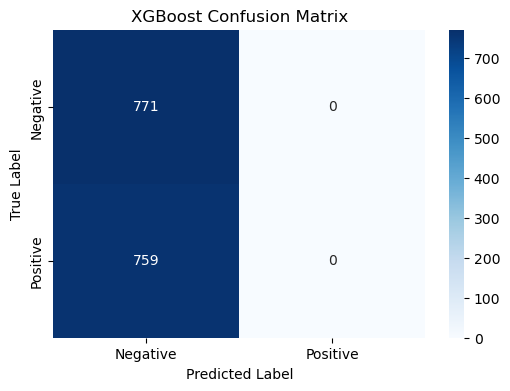

In [8]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
X_combined = hstack([bow_matrix, tfidf_matrix])
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

# Print evaluation metrics
print("XGBoost Evaluation Metrics:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)

# Calculate confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
